In [503]:
import pandas as pd
import plotly.express as px
import numpy as np
import sqlite3
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import warnings

In [372]:
warnings.filterwarnings('ignore')

# Import and Read data

In [373]:
df=pd.read_excel("clinical-study.xlsx")
df1=pd.read_excel("protein-levels.xlsx")

In [374]:
df.head()

,subject_id,age,sex,weight,height,trt_grp,RESPONSE
0,SUBJ_001,46.0,Female,84.66,1.59,DRUG,N
1,SUBJ_001,46.0,Female,84.66,1.59,DRUG,N
2,SUBJ_002,47.0,Female,71.21,1.64,DRUG,Y
3,SUBJ_003,48.0,Female,69.85,1.73,CONTROL,N
4,SUBJ_004,59.0,Female,62.94,1.50,DRUG,Y


In [375]:
df1.head()

,participant_id,protein_concentration
0,SUBJ_001,148.0
1,SUBJ_002,85.0
2,SUBJ_003,183.0
3,SUBJ_004,89.0
4,SUBJ_005,137.0


# Examine Data

In [376]:
# To check how many rows and columns in both the data frame, we use shape attributes which will return a tuple to
# show how many columns and rows.

In [377]:
df.shape

(772, 7)

In [378]:
# There are total 772 rows and 7 columnsin the dataframe(df)

In [379]:
# Similarly check for dataframe(df1)

In [380]:
df1.shape

(768, 2)

In [381]:
# 768 number od rows and just 2 columns present in dataframe(df1)

In [382]:
# Lets get some information about the dataframe(df)

In [383]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 772 entries, 0 to 771
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   subject_id  772 non-null    object 
 1   age         772 non-null    float64
 2   sex         772 non-null    object 
 3   weight      761 non-null    float64
 4   height      772 non-null    float64
 5   trt_grp     772 non-null    object 
 6   RESPONSE    772 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.3+ KB


In [384]:
# info() is the pandas function which enable to show a column with all the columns name, number of non-null values
# in corresponding columns, datatypes of each columns and memory usage.
# We can clearly see there are 7 columns (Subject_id, age, sex, weight, height, trt_grp and RESPONSE), every column
# have 772 non-null values except the column name "weight" which contains 761 non-values.
# there are 4 columns(subject_id, sex, trt_grp and RESPONSE) tha have object datatypes and rest of them have float.
# Overall the usage of memory is 42.3 kilobyte.

In [385]:
# similarly for dataframe(df1)

In [386]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   participant_id         768 non-null    object 
 1   protein_concentration  763 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.1+ KB


# Clean up Data

### 1. Duplicates

In [387]:
# Lets check if there are duplicates or repitition of cells are present in the both dataframe(df and df1) 

In [388]:
df[df.duplicated(keep=False)]

,subject_id,age,sex,weight,height,trt_grp,RESPONSE
0,SUBJ_001,46.0,Female,84.66,1.59,DRUG,N
1,SUBJ_001,46.0,Female,84.66,1.59,DRUG,N


In [389]:
df["subject_id"].duplicated().sum()

1

In [390]:
# duplicated() is the pandas function which gives boolean value as True and False. True means duplicate value while
# False represent non-duplicate value. I have used sum() to sumup number of duplicated cells.

# There is only one duplicate in the Coulmn "Subject ID" which we will delete in the following code because
# we need unique cells in order to get good performance in analysis and modelling.

In [391]:
df=df.drop_duplicates()

In [392]:
# drop_duplicates() is the function that delete the duplicate rows in dataframe.

In [393]:
df.duplicated().sum()

0

In [394]:
#Now we have no duplicate rows.

### 2. Removing rows age below 18

In [395]:
df

,subject_id,age,sex,weight,height,trt_grp,RESPONSE
0,SUBJ_001,46.000,Female,84.660,1.59000,DRUG,N
2,SUBJ_002,47.000,Female,71.210,1.64000,DRUG,Y
3,SUBJ_003,48.000,Female,69.850,1.73000,CONTROL,N
4,SUBJ_004,59.000,Female,62.940,1.50000,DRUG,Y
5,SUBJ_005,59.000,Female,113.910,1.63000,CONTROL,N
...,...,...,...,...,...,...,...
767,SUBJ_767,53.000,Male,88.670,1.72000,DRUG,Y
768,SUBJ_768,68.000,Female,80.290,1.63000,DRUG,Y
769,SUBJ_A69,7.200,Female,22.310,1.19300,DRUG,N
770,SUBJ_A70,8.310,Female,24.220,1.27440,CONTROL,N


In [396]:
# we can clearly see there are few data which contains age less than 18. we can remove them becasue they are
# no use for this clinical trail data.

In [397]:
df=df[df["age"]>=18]

In [398]:
df

,subject_id,age,sex,weight,height,trt_grp,RESPONSE
0,SUBJ_001,46.0,Female,84.66,1.59,DRUG,N
2,SUBJ_002,47.0,Female,71.21,1.64,DRUG,Y
3,SUBJ_003,48.0,Female,69.85,1.73,CONTROL,N
4,SUBJ_004,59.0,Female,62.94,1.50,DRUG,Y
5,SUBJ_005,59.0,Female,113.91,1.63,CONTROL,N
...,...,...,...,...,...,...,...
764,SUBJ_764,61.0,Female,82.95,1.59,CONTROL,Y
765,SUBJ_765,65.0,Male,112.86,1.76,DRUG,N
766,SUBJ_766,60.0,Male,81.03,1.77,DRUG,N
767,SUBJ_767,53.0,Male,88.67,1.72,DRUG,Y


In [399]:
# Now we can see that we have filtered our dataframe for only aged 18 or more.

### 3. Null Values

In [400]:
df.isna().sum()

subject_id     0
age            0
sex            0
weight        11
height         0
trt_grp        0
RESPONSE       0
dtype: int64

In [401]:
# isna() is a function which return boolean values and identifies null values. i have used sum to sumup the
# number of null vlaues in columns. Here we have 11 number of null values present in the column "weight".

In [402]:
df[df["weight"].isna()]

,subject_id,age,sex,weight,height,trt_grp,RESPONSE
10,SUBJ_010,73.0,Female,NaN,1.64,DRUG,Y
50,SUBJ_050,65.0,Male,NaN,1.71,DRUG,N
61,SUBJ_061,61.0,Male,NaN,1.79,CONTROL,N
82,SUBJ_082,65.0,Male,NaN,1.78,CONTROL,N
146,SUBJ_146,56.0,Female,NaN,1.57,CONTROL,N
372,SUBJ_372,67.0,Female,NaN,1.62,CONTROL,N
427,SUBJ_427,66.0,Male,NaN,1.83,CONTROL,N
495,SUBJ_495,60.0,Female,NaN,1.65,CONTROL,N
523,SUBJ_523,62.0,Female,NaN,1.60,DRUG,N
685,SUBJ_685,74.0,Male,NaN,1.81,CONTROL,N


In [403]:
# it can be seen column "Weight" have null values(NaN) which now can be deleted easily but if we try to delete those
# values using drop_na() function then whole corresponding rows will get deleted. It is not good idea to delete
# rows. Better lets put average values in those null cells.

In [404]:
#1. Lets calculate average value of column weight for those female who have height range 1.57 to 1.65
# and age from 56.0 to 73.0
#2. Now lets calculate average value of column "weight" for those male have height range 1.71 to 1.83
# and age from 61 to 74.

In [405]:
df_female= df[(df["height"]>=1.57) & (df["height"]<=1.65) & (df["age"]>=56.0) & 
                  (df["age"]<=73.0) & (df["sex"]=="Female")]
df_female

,subject_id,age,sex,weight,height,trt_grp,RESPONSE
5,SUBJ_005,59.0,Female,113.91,1.63,CONTROL,N
10,SUBJ_010,73.0,Female,NaN,1.64,DRUG,Y
18,SUBJ_018,65.0,Female,80.04,1.64,CONTROL,Y
20,SUBJ_020,73.0,Female,94.38,1.65,DRUG,Y
25,SUBJ_025,56.0,Female,99.69,1.65,DRUG,Y
...,...,...,...,...,...,...,...
748,SUBJ_748,57.0,Female,123.69,1.63,CONTROL,N
753,SUBJ_753,62.0,Female,70.64,1.65,CONTROL,N
754,SUBJ_754,67.0,Female,111.12,1.60,CONTROL,N
764,SUBJ_764,61.0,Female,82.95,1.59,CONTROL,Y


In [406]:
df_female_avg=df_female["weight"].mean()
round(df_female_avg, 2)

86.6

In [407]:
# we got the average values for those females. Now we can easily put 86.6 in those cells for female.

In [408]:
df_male=df[(df["height"]>=1.71) & (df["height"]<=1.83) & (df["age"]>=61) & (df["age"]<=74) & 
   (df["sex"]=="Male")]
df_male

,subject_id,age,sex,weight,height,trt_grp,RESPONSE
6,SUBJ_006,63.0,Male,79.33,1.77,CONTROL,Y
11,SUBJ_011,67.0,Male,109.12,1.71,CONTROL,Y
15,SUBJ_015,65.0,Male,80.21,1.77,DRUG,N
21,SUBJ_021,61.0,Male,122.87,1.78,CONTROL,N
34,SUBJ_034,66.0,Male,63.33,1.79,CONTROL,N
...,...,...,...,...,...,...,...
752,SUBJ_752,69.0,Male,127.64,1.82,DRUG,Y
756,SUBJ_756,65.0,Male,117.14,1.80,DRUG,N
760,SUBJ_760,66.0,Male,106.50,1.74,CONTROL,N
762,SUBJ_762,64.0,Male,137.41,1.77,CONTROL,Y


In [409]:
df_male_avg=df_male["weight"].mean()
round(df_male_avg, 2)

100.61

In [410]:
#The average values for those males. Now we can easily put 100.61 in those cells for male.

In [411]:
# Lets fill the average values for female and male in their corresponing null values.

In [412]:
for i in df["sex"]:
    if i=="Female":
        df["weight"].fillna(86.6, inplace=True)
    else:
        df["weight"].fillna(72.5, inplace=True)

In [413]:
# We have filled their average values using above code now lets check if there is still any null values present.

In [414]:
df.isna().sum()

subject_id    0
age           0
sex           0
weight        0
height        0
trt_grp       0
RESPONSE      0
dtype: int64

In [415]:
# Finally we have no null values in df. Lets do similar for df1.

In [416]:
df1.isna().sum()

participant_id           0
protein_concentration    5
dtype: int64

In [417]:
# There are 5 null values. Lets put the average value of column "protein_concentration".

In [418]:
df1.fillna(value=df1["protein_concentration"].mean, inplace=True)

In [419]:
df1.isna().sum()

participant_id           0
protein_concentration    0
dtype: int64

### 4. BMI calculation

In [420]:
BMI=round(df["weight"]/df["height"]**2, 2)

In [421]:
# we have calculated BMI by diving weight with square of height. and lets insert it into the dataframe(df).

In [422]:
BMI

0      33.49
2      26.48
3      23.34
4      27.97
5      42.87
       ...  
764    32.81
765    36.43
766    25.86
767    29.97
768    30.22
Length: 768, dtype: float64

In [423]:
# Lets insert the BMI column at 5th position in the dataframe.

In [424]:
df.insert(5, "BMI", BMI)

In [425]:
df

,subject_id,age,sex,weight,height,BMI,trt_grp,RESPONSE
0,SUBJ_001,46.0,Female,84.66,1.59,33.49,DRUG,N
2,SUBJ_002,47.0,Female,71.21,1.64,26.48,DRUG,Y
3,SUBJ_003,48.0,Female,69.85,1.73,23.34,CONTROL,N
4,SUBJ_004,59.0,Female,62.94,1.50,27.97,DRUG,Y
5,SUBJ_005,59.0,Female,113.91,1.63,42.87,CONTROL,N
...,...,...,...,...,...,...,...,...
764,SUBJ_764,61.0,Female,82.95,1.59,32.81,CONTROL,Y
765,SUBJ_765,65.0,Male,112.86,1.76,36.43,DRUG,N
766,SUBJ_766,60.0,Male,81.03,1.77,25.86,DRUG,N
767,SUBJ_767,53.0,Male,88.67,1.72,29.97,DRUG,Y


### 5. Merge df(clinical_study) and df1(protien_level)

In [426]:
# to merge the two dataframe, there should be a common column between both the dataframe. In our case, column
# subject_id in clinical_study and paticipant_id in protien_level are same. therefore lets use both as common
# column. The name of their column is different. Lets change one of their name. changing participant_id to 
# subject_id.

In [427]:
df1.rename(columns={"participant_id":"subject_id"}, inplace=True)

In [428]:
df1.head()

,subject_id,protein_concentration
0,SUBJ_001,148.0
1,SUBJ_002,85.0
2,SUBJ_003,183.0
3,SUBJ_004,89.0
4,SUBJ_005,137.0


In [429]:
# I have changed column name to subject_id. Now i can easiy merge both the dataframe using suject_id.

In [430]:
df_merged=pd.merge(df, df1, on="subject_id", how="left")
df_merged.head()

,subject_id,age,sex,weight,height,BMI,trt_grp,RESPONSE,protein_concentration
0,SUBJ_001,46.0,Female,84.66,1.59,33.49,DRUG,N,148.0
1,SUBJ_002,47.0,Female,71.21,1.64,26.48,DRUG,Y,85.0
2,SUBJ_003,48.0,Female,69.85,1.73,23.34,CONTROL,N,183.0
3,SUBJ_004,59.0,Female,62.94,1.50,27.97,DRUG,Y,89.0
4,SUBJ_005,59.0,Female,113.91,1.63,42.87,CONTROL,N,137.0


In [431]:
# here i used merge() function to join both the dataframe on common column and used left join because i want
# to keep all the data from df and matched value from df1.

In [432]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   subject_id             768 non-null    object 
 1   age                    768 non-null    float64
 2   sex                    768 non-null    object 
 3   weight                 768 non-null    float64
 4   height                 768 non-null    float64
 5   BMI                    768 non-null    float64
 6   trt_grp                768 non-null    object 
 7   RESPONSE               768 non-null    object 
 8   protein_concentration  768 non-null    object 
dtypes: float64(4), object(5)
memory usage: 60.0+ KB


In [433]:
# protien_concentration is object datatype, it needs to change to float type because values are numerical.
# I have used to_numeric() function to convert object datatype to float datatype.

In [434]:
df_merged["protein_concentration"] = pd.to_numeric(df_merged["protein_concentration"], errors='coerce')

In [435]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   subject_id             768 non-null    object 
 1   age                    768 non-null    float64
 2   sex                    768 non-null    object 
 3   weight                 768 non-null    float64
 4   height                 768 non-null    float64
 5   BMI                    768 non-null    float64
 6   trt_grp                768 non-null    object 
 7   RESPONSE               768 non-null    object 
 8   protein_concentration  763 non-null    float64
dtypes: float64(5), object(4)
memory usage: 60.0+ KB


# Exploratory Data Analysis(EDA)

### 1. Compare mean age in two treatment groups

In [436]:
df_merged["trt_grp"].value_counts()

CONTROL    385
DRUG       383
Name: trt_grp, dtype: int64

In [437]:
# there are 383 people who are using new drugs while 385 number of people are using standard of care.

In [438]:
round(df_merged[df_merged["trt_grp"]=="DRUG"]["age"].mean(), 2)

61.76

In [439]:
# 61.76 is the mean age of people who are using new drugs.

In [440]:
round(df_merged[df_merged["trt_grp"]=="CONTROL"]["age"].mean(), 2)

61.86

In [441]:
# 61.86 is the mean age of people who are using standard of care.

In [442]:
# If i rounded the numbers it will be 62. we can also see in the following histogram which shows median=62. which
# means 62 is the average age for those who are taking new Drugs as well as standard of care.
# mean age for DRUG and CONTROL are approx. 62.

In [443]:
px.histogram(df_merged, x="age", color="trt_grp", marginal="box")

### 2. Compare mean age in responders vs non-responders

In [444]:
round(df_merged[df_merged["RESPONSE"]=="Y"]["age"].mean(), 2)

61.89

In [445]:
round(df_merged[df_merged["RESPONSE"]=="N"]["age"].mean(), 2)

61.75

In [446]:
# average age is 62 for responsing both "yes" as well for "no". It means people who have 62 is responsing Yes
# or tumors are shrinking as well as getting bigger. It can see in histogram plot which shows median = 62.

In [447]:
px.histogram(df_merged, x="age", color="RESPONSE", marginal="box")

### 3. Compare responders and non-responders in the two treatment arms

In [448]:
round(df_merged[df_merged["RESPONSE"]=="Y"]["age"].mean(), 2)

61.89

In [449]:
df_merged["RESPONSE"].value_counts()

N    434
Y    334
Name: RESPONSE, dtype: int64

In [450]:
df_merged.groupby(["RESPONSE", "trt_grp"]).size()

RESPONSE  trt_grp
N         CONTROL    261
          DRUG       173
Y         CONTROL    124
          DRUG       210
dtype: int64

In [451]:
# There are 261 uses standard of care(CONTROL) and 173 uses new drug response to "NO" which means their tumors
# are staying same or getting bigger. however, 124 standard of care and 210 new drugs taker response to "YES"
# which further means their tumors are shrinking. Therefore it can be seen from the following bar chart that 
# the number of people are more who does not prefer standard of care. However, more they like to prefer new drugs.

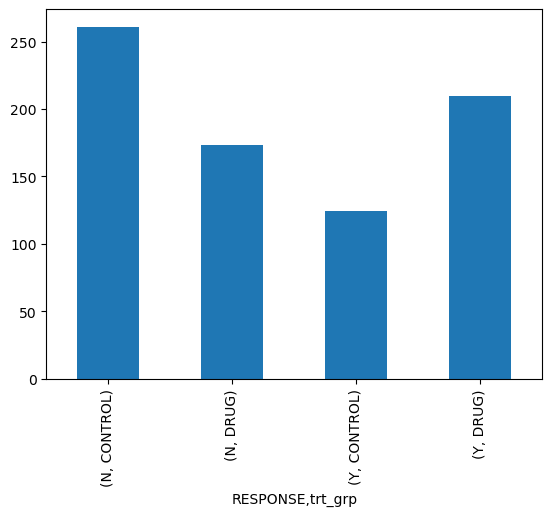

In [452]:
df_merged.groupby(["RESPONSE", "trt_grp"]).size().plot(kind="bar");

### 4. Compare mean weight in responders/non-responders

In [453]:
round(df_merged[df_merged["RESPONSE"]=="Y"]["weight"].mean(), 2)

93.22

In [454]:
# The mean of weight is 93.22 for patient whose response is "Yes" means those patient have average weight 93.22
# responded to treatment or another words their turmors are shrinking. It can be seen clearly in the histogram chart.

In [455]:
round(df_merged[df_merged["RESPONSE"]=="N"]["weight"].mean(), 2)

89.85

In [456]:
px.histogram(df_merged, x="weight", color="RESPONSE", marginal="box")

### 5. Compare protein concentration in responders vs non responders

In [457]:
px.histogram(df_merged, x="protein_concentration", color="RESPONSE", marginal="box")

In [458]:
###** RESPONSE = YES or Tumors are shrinking **###
# protein concentration range: 105 to 109
# Average of protein concentration = 102.5
# Number of patient = 37

###** RESPONSE = NO or Tumors are getting bigger **###
# protein concentration range: 100 to 104
# Average of protein concentration = 133
# Number of patient = 32

# Box plot

### 1. Age Vs Response

In [459]:
px.box(df_merged, y="age", x="RESPONSE", points="all")

In [460]:
# It can be clearly seen that box plot for both Responses are almost same.

## For Resonse N ##
# 50% data lies in the boxwhich means from 57 year to 67 year age people getting their tumors bigger however
# median of age is 62 which can also means average people (62 years old) responding NO.

## For Response Y ##
# from 57 year to 67 year age people shrinking their tumors however
# median of age is 62 which can also means average people (62 years old) responding YES.

In [461]:
px.box(df_merged, y="age", x="RESPONSE", color="trt_grp", points="all")

In [462]:
### Response = NO or tumors are getting bigger and preferring new drugs ###
# Average age is 62 who prefers taking new drugs but still their tumors are getting bigger, also 50% of the 
# patients whose age lies between 56 to 66 are prefering taking new drugs but their tumors are increasing in size.
# Patients whose age are 79 is strongly agreed on taking new drugs while the patient who have 37 years old are 
# weakly agreed on taking new drugs but size of tumors are increasing in both cases.

## Response = NO or tumors are getting bigger and preferring Standard of Care(CONTROL)##
# Average age of patient = 62
# 50% of the patients aged from 58 to 67
# 79 years old patient strongly agreed while 43 years old patient is weakly agreed on taking standard of care(CONTROL)
# however their tumors are increasing.


### FOR RESPONSE YES or tumors are shrinking ###
## for new drugs ##
# average age 63 year old
# 50% data where range of age is from 57 to 68
# strongly agreed age is 79
# weakly agreed age is 37

## For care of standard(CONTROL) ##
# average age is 61 yeasr old
# 50% data where range of age is from 58 to 66
# strongly agreed age is 79
# weakly agreed age is 39

### 2. Weight/BMI Vs Response

In [463]:
px.box(df_merged, x="RESPONSE", y="weight", points="all")

In [464]:
###** RESPONSE = NO or tumors are getting bigger **###
# average weight of patient = 86.6
# 50% data where range of patient weight is from 75.67 to 102.94
# strongly agreed weight of patient is 142.42
# weakly agreed weight of patient is 47.31

###** RESPONSE = YES or tumors are shrinking **###
# average weight of patient = 91.09
# 50% data where range of patient weight is from 76.08 to 107.34
# strongly agreed weight of patient is 150.35
# weakly agreed weight of patient is 46.17

In [465]:
px.box(df_merged, x="RESPONSE", y="weight", color="trt_grp", points="all")

In [466]:
###** RESPONSE = NO or tumors are getting bigger **###
## Prefers New Drugs ##
# average weight of patient = 87.21
# 50% data where range of patient weight is from 75.50 to 103.94
# strongly agreed weight of patient is 151.28
# weakly agreed weight of patient is 47.31
## prefers Standars of Care(CONTROL) ##
# average weight of patient = 86.6
# 50% data where range of patient weight is from 75.92 to 102.83
# strongly agreed weight of patient is 142.42
# weakly agreed weight of patient is 50.29

###** RESPONSE = YES or tumors are Shrinking **###
## Prefers New Drugs ##
# average weight of patient = 105.77
# 50% data where range of patient weight is from 73.44 to 105.77
# strongly agreed weight of patient is 160.12
# weakly agreed weight of patient is 46.17
## prefers Standars of Care(CONTROL) ##
# average weight of patient = 91.62
# 50% data where range of patient weight is from 80 to 108.16
# strongly agreed weight of patient is 182.5
# weakly agreed weight of patient is 55.68

### 3. Protein Concentration Vs Response

In [467]:
px.box(df_merged, x="RESPONSE", y="protein_concentration", points="all")

In [468]:
###** RESPONSE = NO or tumors are getting bigger **###
# average protein concentration of patient = 133
# 50% data where range of protein concentration is from 112 to 155.75
# strongly agreed, protein concentration of patient is 199
# weakly agreed, protein concentration of patient is 65

###** RESPONSE = YES or tumors are Shrinking **###
# average protein concentration of patient = 102.5
# 50% data where range of protein concentration is from 90.5 to 116.5
# strongly agreed, protein concentration of patient is 187
# weakly agreed, protein concentration of patient is 44

In [469]:
px.box(df_merged, x="RESPONSE", y="protein_concentration", color="trt_grp", points="all")

In [470]:
###** RESPONSE = NO or tumors are getting bigger **###
## Preffering New Drugs ##
# average protein concentration of patient = 143.5
# 50% data where range of protein concentration is from 127 to 164
# strongly agreed, protein concentration of patient is 199
# weakly agreed, protein concentration of patient is 83
## Preffering Standard of Care(CONTROL) ##
# average protein concentration of patient = 124
# 50% data where range of protein concentration is from 107 to 149.25
# strongly agreed, protein concentration of patient is 198
# weakly agreed, protein concentration of patient is 65

###** RESPONSE = YES or tumors are Shrinking **###
## Preffering New Drugs ##
# average protein concentration of patient = 102
# 50% data where range of protein concentration is from 91 to 116
# strongly agreed, protein concentration of patient is 174
# weakly agreed, protein concentration of patient is 56
## Preffering Standard of Care(CONTROL) ##
# average protein concentration of patient = 103
# 50% data where range of protein concentration is from 90 to 117.75
# strongly agreed, protein concentration of patient is 187
# weakly agreed, protein concentration of patient is 44

# Featuring Engineering

## One-hot encoding

In [471]:
# Lets convert column "sex" from string data to numerical
# here i have used get_dummies() function to convert categorical into dummies (0 and 1).

In [472]:
df_model=df_merged

In [473]:
dum_df = pd.get_dummies(df_model['sex'])
dum_df.sample(5)

,Female,Male
578,0,1
498,1,0
365,1,0
608,1,0
335,1,0


In [476]:
# Now concat both the column in the main dataframe(df_model) usinf concat function.
# we can see 2 new column appeared in the dataframe.

In [475]:
df_model=pd.concat([df_model,dum_df],axis='columns')
df_model.sample(5)

,subject_id,age,sex,weight,height,BMI,trt_grp,RESPONSE,protein_concentration,Female,Male
756,SUBJ_757,57.0,Male,102.04,1.79,31.85,DRUG,N,137.0,0,1
216,SUBJ_217,62.0,Female,93.14,1.61,35.93,CONTROL,Y,109.0,1,0
101,SUBJ_102,56.0,Male,75.01,1.70,25.96,CONTROL,N,151.0,0,1
263,SUBJ_264,59.0,Male,88.47,1.66,32.11,CONTROL,Y,142.0,0,1
307,SUBJ_308,51.0,Female,64.69,1.62,24.65,DRUG,N,137.0,1,0


In [479]:
# Lets remove the the column "sex" because it contains string values and we only need numerical value in order to
# work with machine learning model.

In [478]:
df_model=df_model.drop("sex", axis=1)

In [480]:
df_model.sample(5)

,subject_id,age,weight,height,BMI,trt_grp,RESPONSE,protein_concentration,Female,Male
623,SUBJ_624,65.0,110.45,1.59,43.69,DRUG,Y,94.0,1,0
74,SUBJ_075,71.0,86.88,1.65,31.91,DRUG,Y,79.0,1,0
512,SUBJ_513,66.0,73.17,1.75,23.89,CONTROL,Y,91.0,0,1
401,SUBJ_402,56.0,75.51,1.77,24.10,DRUG,N,137.0,0,1
417,SUBJ_418,70.0,118.26,1.76,38.18,DRUG,N,144.0,0,1


In [481]:
df_model=df_model.drop("subject_id", axis=1)

In [482]:
df_model.head(5)

,age,weight,height,BMI,trt_grp,RESPONSE,protein_concentration,Female,Male
0,46.0,84.66,1.59,33.49,DRUG,N,148.0,1,0
1,47.0,71.21,1.64,26.48,DRUG,Y,85.0,1,0
2,48.0,69.85,1.73,23.34,CONTROL,N,183.0,1,0
3,59.0,62.94,1.50,27.97,DRUG,Y,89.0,1,0
4,59.0,113.91,1.63,42.87,CONTROL,N,137.0,1,0


In [ ]:
# Lets do for the "trt_grp" and "RESPONSE".

In [483]:
dum_df = pd.get_dummies(df_model['trt_grp'])
dum_df.sample(5)

,CONTROL,DRUG
98,0,1
82,1,0
15,0,1
404,1,0
505,0,1


In [484]:
df_model=pd.concat([df_model,dum_df],axis='columns')
df_model.sample(5)

,age,weight,height,BMI,trt_grp,RESPONSE,protein_concentration,Female,Male,CONTROL,DRUG
565,62.0,66.06,1.59,26.13,DRUG,Y,95.0,1,0,0,1
107,72.0,91.51,1.77,29.21,DRUG,N,144.0,0,1,0,1
414,62.0,114.68,1.83,34.24,CONTROL,N,138.0,0,1,1,0
280,57.0,89.27,1.53,38.13,DRUG,N,146.0,1,0,0,1
320,68.0,72.60,1.62,27.66,CONTROL,Y,129.0,1,0,1,0


In [486]:
df_model=df_model.drop("trt_grp", axis=1)
df_model.sample(5)

,age,weight,height,BMI,RESPONSE,protein_concentration,Female,Male,CONTROL,DRUG
414,62.0,114.68,1.83,34.24,N,138.0,0,1,1,0
225,62.0,100.81,1.71,34.48,Y,87.0,0,1,0,1
368,61.0,82.86,1.74,27.37,N,81.0,0,1,1,0
322,59.0,84.75,1.77,27.05,N,124.0,0,1,1,0
677,66.0,93.42,1.63,35.16,Y,93.0,1,0,1,0


In [487]:
dum_df = pd.get_dummies(df_model['RESPONSE'])
dum_df.sample(5)

,N,Y
198,1,0
678,1,0
55,1,0
161,0,1
764,1,0


In [488]:
df_model=pd.concat([df_model,dum_df],axis='columns')
df_model.sample(5)

,age,weight,height,BMI,RESPONSE,protein_concentration,Female,Male,CONTROL,DRUG,N,Y
575,37.0,84.16,1.54,35.49,Y,119.0,1,0,0,1,0,1
480,48.0,84.37,1.54,35.58,N,158.0,1,0,1,0,1,0
724,69.0,89.57,1.65,32.90,Y,111.0,1,0,1,0,0,1
114,70.0,100.60,1.82,30.37,N,160.0,0,1,1,0,1,0
463,64.0,90.77,1.82,27.40,Y,88.0,0,1,1,0,0,1


In [489]:
 df_model=df_model.drop("RESPONSE", axis=1)
df_model.sample(5)

,age,weight,height,BMI,protein_concentration,Female,Male,CONTROL,DRUG,N,Y
649,50.0,87.27,1.83,26.06,107.0,0,1,1,0,1,0
679,68.0,71.99,1.73,24.05,101.0,0,1,0,1,0,1
314,59.0,87.44,1.56,35.93,109.0,1,0,1,0,1,0
355,67.0,80.62,1.63,30.34,165.0,1,0,1,0,1,0
80,68.0,54.54,1.56,22.41,113.0,1,0,1,0,1,0


In [490]:
# Now we have our dataset which contain only numerical value.

# Train-Test Split

In [493]:
v=df_model["age"]          
U=df_model.drop(["age"], axis=1)

In [498]:
# we have splited data into train and test for training and testing the data separately. 30% test size and 70%
# for training the data.

In [496]:
U_train, U_test, v_train, v_test = train_test_split(U, v, test_size = 0.3, random_state=37)
print(U_test.shape)
print(U_train.shape)

(231, 10)
(537, 10)


# SVM classifier